In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
import csv
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
#Abrindo o corpus, e iterando ele.
corpus = ''
with open('Corpus.csv', 'r') as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        for line in row:
            corpus += line.replace('"',' ').replace("'"," ").lower() + " "

In [63]:
stopwords_list = ['muitos','onde','havia','dos','mas','dia','veio','disse','que','ficou','houve','era','uns','quem','qual','uns']

In [64]:
#Filtrando o conteudo do corpus.
corpus_tokenized = word_tokenize(corpus)
#Criando a lista de stopwords com os stopwords do nltk, pontuações, e uma lista customizada com stopwords proprias.
stop_words = set(stopwords.words('portuguese') + list(punctuation)+list(stopwords_list))
corpus_tokenized_filtered = [token for token in corpus_tokenized if token not in stop_words and len(token)>2]

In [65]:
#Aplicando o contador de frequencia do nltk
from nltk.probability import FreqDist
top_tokens = FreqDist(corpus_tokenized_filtered)
top_tokens = list(top_tokens.keys())
top_100_tokens = top_tokens[:100]
top_tokens_str = ''
for word in top_100_tokens:
    top_tokens_str += " "+word+" "

['quilombo', 'palmares', 'negros', 'fugitivos', 'afugentaram', 'cor', 'deus', 'paraíso', 'tronco', 'trancador', 'trilha', 'mato', 'fechado', 'pés', 'descalçados', 'descansavam', 'perseguições', 'barões', 'café', 'capitão', 'malfeitor', 'negro', 'intocado', 'difícil', 'achar', 'senhor', 'véio', 'zumbi', 'ferido', 'grande', 'batalha', 'guerreiro', 'traído', 'novembro', 'céu', 'anuviou', 'rei', 'defesa', 'total', 'liberdade', 'início', 'final', 'buscou', 'igualdade', 'angola', 'nação', 'africana', 'consciência', 'humana', 'primeira', 'boa', 'invenção', 'roda', 'homem', 'evoluiu', 'fogo', 'fonte', 'vida', 'água', 'formato', 'terra', 'globo', 'luz', 'noite', 'lua', 'conta', 'horas', 'tempo', 'faz', 'país', 'povo', 'mundo', 'todo', 'espaço', 'movimento', 'ciência', 'religião', 'visão', 'diferente', 'vale', 'coração', 'gente', 'defende', 'interesses', 'explicam', 'matemática', 'outros', 'rezam', 'deuses', 'exata', 'remove', 'montanhas', 'faça', 'contas', 'padre', 'fala', 'formula', 'amor', 'c

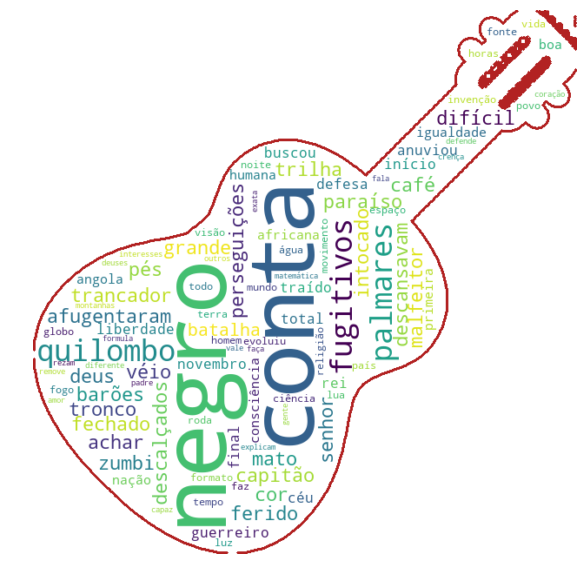

In [66]:
guitar_mask = np.array(Image.open("semfundo.png"))

#Criando a wordcloud
wc = WordCloud(background_color="white", max_words=100, mask=guitar_mask,
               contour_width=3, contour_color='firebrick')
wc.generate(corpus_tokenized_filtered)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()